<h1>Convolutional Neural Network with Batch-Normalization </h1> 

<!--Empty Space for separating topics-->

<h2>Preparation</h2>

In [2]:
!conda install -y torchvision

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _pytorch_select-0.2        |            gpu_0           2 KB
    torchvision-0.4.2          |cuda100py36hecfc37a_0         6.8 MB
    cudatoolkit-10.0.130       |                0       380.0 MB
    mkl-service-2.3.0          |   py36he904b0f_0         208 KB
    pytorch-1.3.1              |cuda100py36h53c1284_0       295.5 MB
    mkl-2020.0                 |              166       202.1 MB
    ninja-1.9.0                |   py36hfd86e86_0         1.6 MB
    cudnn-7.6.5                |       cuda10.0_0       226.4 MB
    ------------------------------------------------------------
                                           Total:        1.09 GB

The following NEW packages will be INSTALLED:

    _py

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [2]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    #plt.title('y = '+ str(data_sample[1].item()))

<h2 id="Makeup_Data">Getting the Data</h2> 

In [3]:
IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [4]:
train_dataset = dsets.FashionMNIST(root='Fashion-MNIST/processed/training.pt', train=False, download=True, transform=composed)

In [5]:
validation_dataset = dsets.FashionMNIST(root='Fashion-MNIST/processed/test.pt', train=False, download=True, transform=composed)

In [6]:
#train_dataset[0][1].type()

In [7]:
# The label for the fourth data element

train_dataset[3][1]

1

<!--Empty Space for separating topics-->

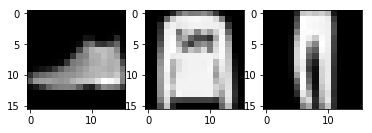

In [8]:
plt.figure()
plt.subplot(131)
show_data(train_dataset[0])

plt.subplot(132)
show_data(train_dataset[1])

plt.subplot(133)
show_data(train_dataset[2])

plt.show()

<h2 id="CNN">Building a  Convolutional Neural Network Class</h2>


Building a Convolutional Network class with two Convolutional layers and one fully connected layer. Adding Batch Norm for the convolutional layers. 

Defining the neural network class using the Relu activation function and thereby defining with He Initialization

Setting p as dropout probability

In [9]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10, p=0):
        super(CNN_batch, self).__init__()
        self.drop1 = nn.Dropout(p=p)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        torch.nn.init.kaiming_uniform_(self.cnn1.weight, nonlinearity='relu')
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.drop2 = nn.Dropout(p=p)
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        torch.nn.init.kaiming_uniform_(self.cnn2.weight, nonlinearity='relu')
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)    
    
     
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(self.drop1(x))
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(self.drop2(x))
        x = self.maxpool2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Building a Convolutional Network class without neural network initialization weights and dropout implementation

In [10]:
class CNN_simple(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_simple, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Building a Convolutional Network class without neural network initialization weights

In [11]:
class CNN_C(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10, p=0):
        super(CNN_C, self).__init__()
        self.drop1 = nn.Dropout(p=p)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        #torch.nn.init.kaiming_uniform_(self.cnn1.weight, nonlinearity='relu')
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.drop2 = nn.Dropout(p=p)
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        #torch.nn.init.kaiming_uniform_(self.cnn2.weight, nonlinearity='relu')
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)    
    
     
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(self.drop1(x))
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(self.drop2(x))
        x = self.maxpool2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Function to training the model 

In [12]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_dataset)
    accuracy_list=[]
    loss_list=[]
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)

        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list

<h2 id="Train">Defining the Convolutional Neural Network Classifier, Criterion function, Optimizer and Training the Model</h2> 

There are 16 output channels for the first layer, and 32 output channels for the second layer 

Dropout probability is 0.1

Momentum value is 0.2

In [21]:
model_batch=CNN_batch(out_1=16, out_2=32, p=0.1)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate, momentum=0.2)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)
accuracy_list_batch, loss_list_batch=train_model(model=model_batch,n_epochs=20,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

#### Plotting the loss and accuracy on the validation data:

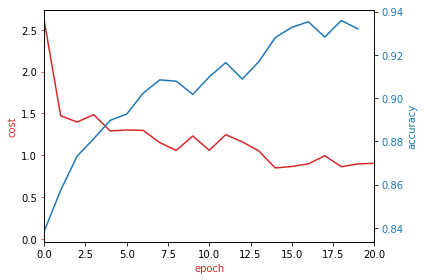

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list_batch,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('cost',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list_batch, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xlim(0, 20)
fig.tight_layout()

## Training model without neural network initialization weights

In [23]:
model_C = CNN_C(out_1=16, out_2=32, p=0.1)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_C.parameters(), lr = learning_rate, momentum=0.2)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)
accuracy_list_C, loss_list_C=train_model(model=model_C,n_epochs=20,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

#### Plotting the loss and accuracy on the validation data:

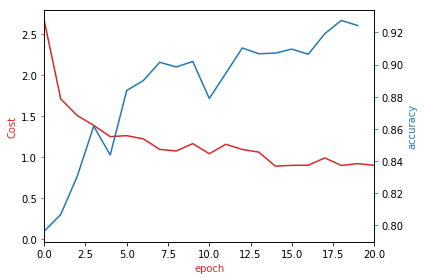

In [24]:
# Plotting the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list_C, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_C, color=color)
ax2.tick_params(axis='y', color=color)
plt.xlim(0, 20)
fig.tight_layout()

## Training model without neural network initialization weights, dropout and momentum implementation 

In [25]:
model_simple=CNN_simple(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_simple.parameters(), lr = learning_rate, momentum=0)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)
accuracy_list_simple, loss_list_simple=train_model(model=model_simple,n_epochs=20,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

<!--Empty Space for separating topics-->

#### Plotting the loss and accuracy on the validation data:

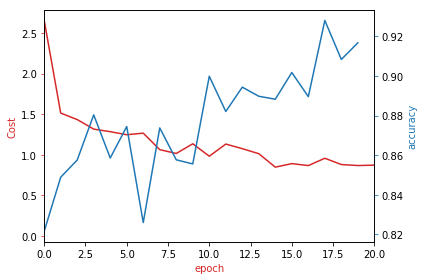

In [26]:
# Plotting the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list_simple, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_simple, color=color)
ax2.tick_params(axis='y', color=color)
plt.xlim(0, 20)
fig.tight_layout()

<h2 id="Result">Analyzing Results</h2> 

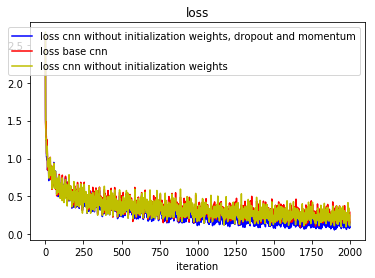

In [27]:
plt.plot(loss_list_simple, 'b',label='loss cnn without initialization weights, dropout and momentum')
plt.plot(loss_list_batch,'r',label='loss base cnn')
plt.plot(loss_list_C,'y',label='loss cnn without initialization weights')

plt.xlabel('iteration')
plt.title("loss")
plt.legend()

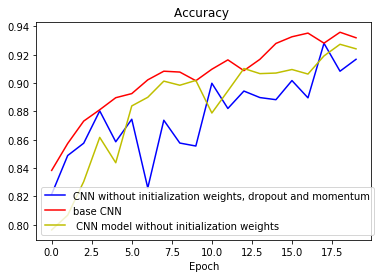

In [28]:
plt.plot(accuracy_list_simple, 'b',label='CNN without initialization weights, dropout and momentum')
plt.plot(accuracy_list_batch,'r',label='base CNN')
plt.plot(accuracy_list_C,'y',label=' CNN model without initialization weights')

plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()

<!--Empty Space for separating topics-->